## Analisis exploratorio de los datos acerca de los anuncios vehiculares en Usa

Se tiene como objetivo realizar un analisis exploratorio sencillo y corto de los vehiculos publicados a venta en Estados Unidos con la finalidad de crear graficos que nos ayuden a visualizar la informacion para facilitar la comprension del comportamiento de los auncios de estos vehiculos , posteriormente seran utilizados para mostrar nuestros resultados en una appweb.

In [5]:
# Se importan las librerias con las que trabajaremos
import pandas as pd
import plotly.express as px



In [6]:
# Se lee la informacion proporcionada en un dataframe
vehicles_df = pd.read_csv(r"D:\app_web_proyect\proyecto_6_tripleten\Vehicles_web_analitics\vehicles_us.csv")

In [7]:
# Obtenemos una descripcion y visualizamos los datos
display(vehicles_df.info())
display(vehicles_df.describe())
vehicles_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


None

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71


Vemos datos descriptivos y una visualizacion de la tabla: Cada fila representa un anuncio de venta de un vehiculo y contiene la informacion del mismo, tal como su precio en dolares, el año del modelo, el nombre del fabricante y el modelo del vehiculo, la condicion en la que se encuentra, cuantos cilindros tiene su motor, que combustible utiliza, el millaje recorrido, el tipo de su transmicion, el tipo de vehiculo, su color, si es 4wd(Traccion a las 4 ruedas), la fecha en que se publico el anuncio y los dias que paso publicado.

Tenemos valores asuentes; en la columna is_4wd, debido a que los unicos valores son 1, se entiende que siendo 1 que si es 4wd y 0 que no lo es, se rellenaran con 0 los valores ausentes. En paint_color se rellenara con "unknow". Para model_year, cylinders y odometer tenemos valores ausentes pero debido al proposito del proyecto se trabajara de esta forma ya que no se considera que repercutan significativamente en los resultados del analisis. 

In [9]:
# Correcion de los datos
vehicles_df["is_4wd"] = vehicles_df["is_4wd"].fillna(0)
vehicles_df["paint_color"] = vehicles_df["paint_color"].fillna("unknow")

Como anteriormente se comento tenemos en la columna model la informacion acerca del fabricante del vehiculo y su modelo, enriquezeremos los datos al agregar columnas con la marca del fabricante y el modelo por separado.

In [11]:
# Se añaden dos columnas en base a model para obtener solo la marca y el modelo del vehiculo
vehicles_df[["manufacturer","modelo"]] = vehicles_df["model"].str.split(n=1, expand= True)

Visualizamos la tabla con sus ajustes.

In [13]:
vehicles_df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,manufacturer,modelo
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,unknow,1.0,2018-06-23,19,bmw,x5
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,ford,f-150
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,hyundai,sonata
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,unknow,0.0,2019-03-22,9,ford,f-150
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,chrysler,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37,nissan,maxima
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22,honda,civic
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32,hyundai,sonata
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71,toyota,corolla


## Graficos

A continuacion observaremos los graficos creados a partir de la informacion proporcionada.

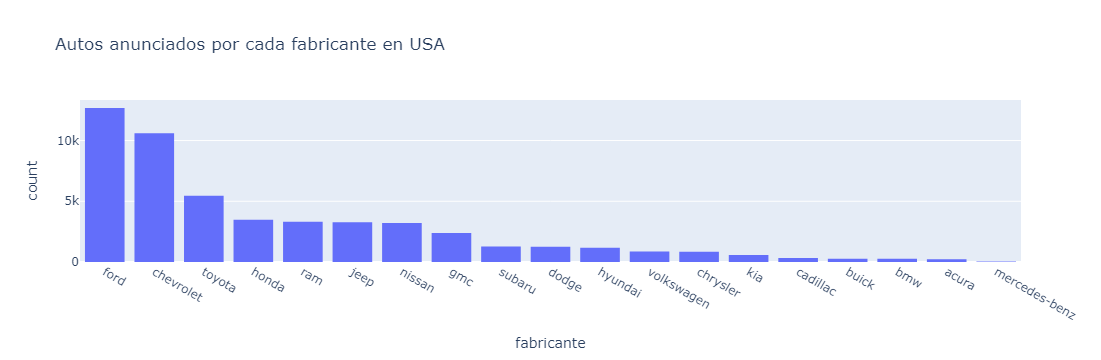

In [36]:
# Grafico 
histograma_n_vehiculos = px.histogram(vehicles_df,
                       x = "manufacturer",
                       title = "Autos anunciados por cada fabricante en USA",
                       labels = {"count":"cantidad", "manufacturer":"fabricante"},
                       category_orders={"manufacturer": vehicles_df["manufacturer"].value_counts().index}
                       )
histograma_n_vehiculos.show()

Podemos observar que una mayor parte de los anuncios de venta publicados pertenecen a los autos de los fabricantes ford y chevrolet, una observacion es que ambas marcas de fabricantes son Estado Unidenses.

In [26]:
group_type_veh = vehicles_df.groupby(["manufacturer","type"])["type"].count().reset_index(name = "count")
group_type_veh

,manufacturer,type,count
0,acura,SUV,3
1,acura,other,2
2,acura,sedan,231
3,bmw,SUV,248
4,bmw,hatchback,1
...,...,...,...
144,volkswagen,coupe,10
145,volkswagen,hatchback,4
146,volkswagen,other,2
147,volkswagen,sedan,809


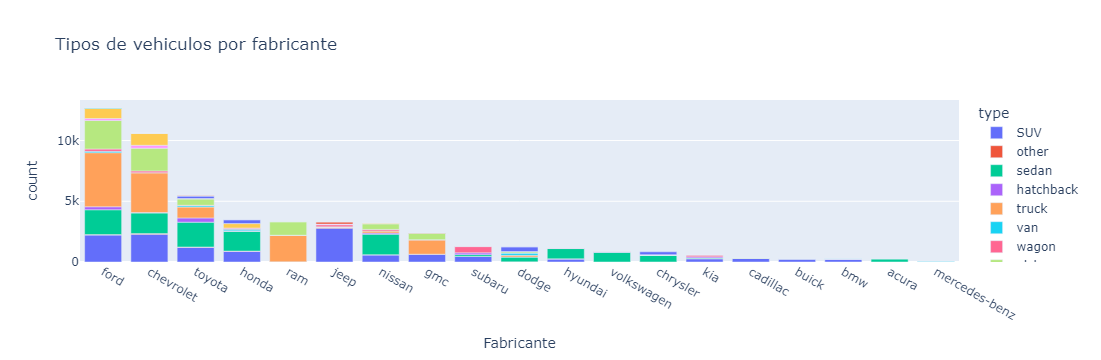

In [38]:
group_type_veh = vehicles_df.groupby(["manufacturer","type"])["type"].count().reset_index(name = "count")
# Grafica 2
tipos_de_vehiculos = px.bar(group_type_veh, 
             x = "manufacturer",
             y = "count",
             color = "type", 
             title = "Tipos de vehiculos por fabricante", 
             labels = {"manufacturer":"Fabricante"}, 
             category_orders={"manufacturer": vehicles_df["manufacturer"].value_counts().index}
            )
tipos_de_vehiculos.show()

Con este grafico podemos visualizar el tipo de vehiculo que se ha anunciado a venta por cada fabricante de una manera dinamica, donde se puede seleccionar el tipo de vehiculo y la altura de la barra representa la suma de los vehiculos de cada tipo.

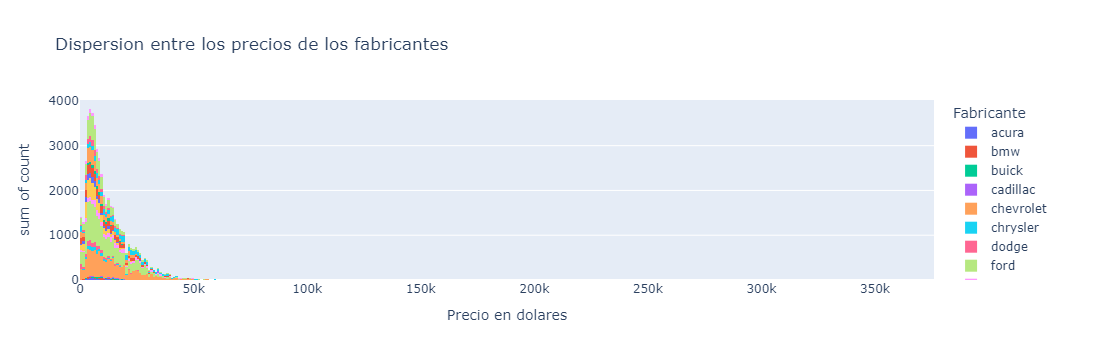

In [40]:
group_per_price = vehicles_df.groupby(["manufacturer","price"])["price"].count().reset_index(name = "count")
# Grafico 3    
dispercion_precios = px.histogram(group_per_price,
            x = "price",
            y = "count",
            color = "manufacturer",
            title = "Dispersion entre los precios de los fabricantes",
            labels = {"manufacturer":"Fabricante" , "price":"Precio en dolares"})
dispercion_precios.show()

Podemos ver la dispercion de los precios de los vehiculos y notar que tenemos una mayor frecuencia de vehiculos que tienen un precio que ronda de 2,000 a 20,000  dolares

## Conclucion

En este punto del analisis simple que hemos hecho podemos concluir que la mayor parte de autos anunciados a venta en USA, son principalmente de fabricantes Estado Unidenses como Ford y Chevrolet, esto puede deberse a razones logisticas como que esos autos son fabricados en USA, provocando asi que sean mas accesibles al publico y por consecuencia tener una mayor prescencia. Tambien concluimos que los precios de los vehiculos anunciados se distribuyen mayormente en un rango de los 2,000 a 20,000 dolares variando dependiendo de su año de modelo y la condicion del vehiculo.